# 이미지 분류를 위한 데이터 증강(Data augmentation)
- 학습에 사용할 이미지 데이터에 양을 늘리기 위해 원본에 각종 변환을 적용하여 증강시키는 기법


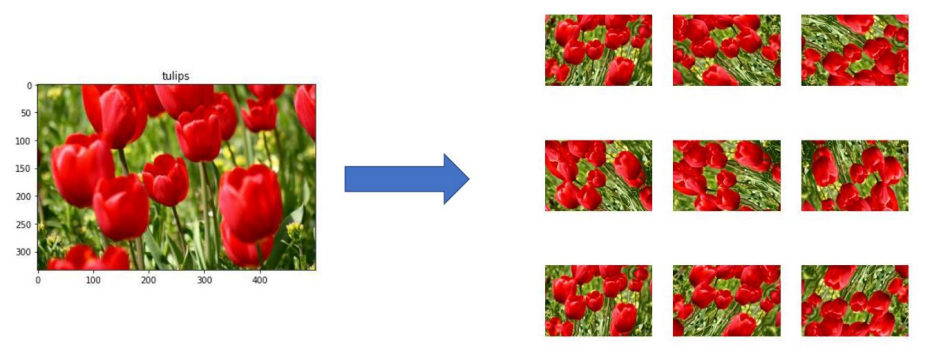

# 재현성 함수

In [283]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

DATA_PATH = os.getcwd()
SEED = 42

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# 구글 드라이브 마운트

In [284]:
#from google.colab import drive
#drive.mount('/content/drive')

In [285]:
!cp "{DATA_PATH}cats_and_dogs.zip" "cats_and_dogs.zip"
!unzip -oqq "cats_and_dogs.zip"

'cp'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'unzip'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [286]:
from glob import glob

In [287]:
from glob import glob

# 고양이 이미지 리스트 (train/cats 디렉토리)
cats_list = sorted(glob(f"{DATA_PATH}/data/cats_and_dogs/train/cats/*.jpg"), key=lambda x: x)

# 개 이미지 리스트 (train/dogs 디렉토리)
dogs_list = sorted(glob(f"{DATA_PATH}/data/cats_and_dogs/train/dogs/*.jpg"), key=lambda x: x)

# 리스트 길이 출력
len(cats_list), len(dogs_list)


(1000, 1000)

- 고양이는 0,  개는 1

In [288]:
labels = [0] * len(cats_list) + [1] * len(dogs_list)
img_path = cats_list + dogs_list

len(labels), len(img_path)

(2000, 2000)

- 섞기

In [289]:
train = np.array(img_path)
target = np.array(labels)

np.random.seed(SEED)

index_arr = np.arange(train.shape[0])

np.random.shuffle(index_arr)
np.random.shuffle(index_arr)

train = train[index_arr]
target = target[index_arr]

In [290]:
img_path = train[0]
img_path

'c:\\study\\03_Deep_Learning/data/cats_and_dogs/train/dogs\\dog.900.jpg'

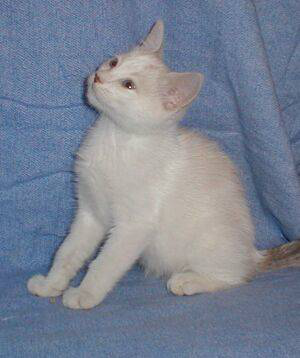

In [291]:
img_path = train[116]
img_path
from PIL import Image
pil_img = Image.open(img_path) # 필로우 객체로 반환되면서 RGB 채널순서
pil_img

# torchvision 라이브러리의 transforms 모듈
- 다양한 이미지 변환을 위한 기능 제공

In [292]:
import torchvision.transforms as transforms

## ToTensor
- 이미지 데이터를 C x H x W 형태의 텐서로 변환
- 스케일링 까지 해준다.

In [293]:
transform_obj = transforms.ToTensor() #pil 객체를 탠서로 변형
transform_obj(pil_img).shape

torch.Size([3, 358, 300])

In [294]:
transform_obj(pil_img).max(), transform_obj(pil_img).min()

(tensor(1.), tensor(0.0353))

## Resize

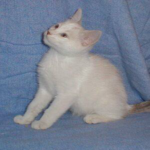

In [295]:
transform_obj = transforms.Resize([150,150])
transform_obj(pil_img)

## RandomHorizontalFlip
- p 파라미터 확률로 좌우반전

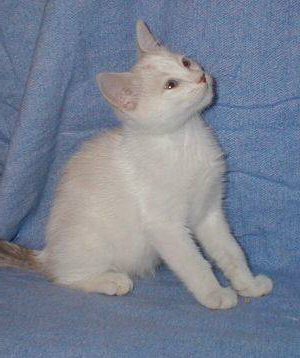

In [296]:
transform_obj = transforms.RandomHorizontalFlip(p=1)
transform_obj(pil_img)

## RandomVerticalFlip
- p 파라미터 확률로 상하반전

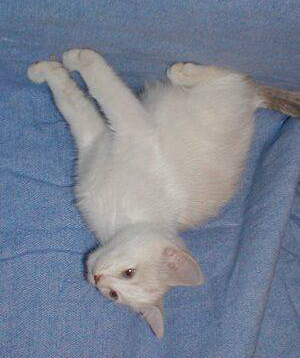

In [297]:
transform_obj = transforms.RandomVerticalFlip(p=1)
transform_obj(pil_img)

## RandomGrayscale
- p 파라미터 확률로 흑백이미지로 변환

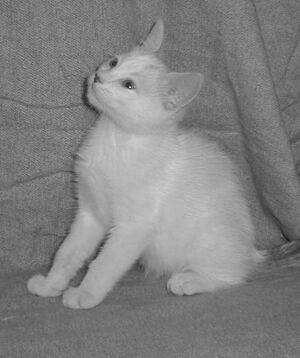

In [298]:
transform_obj = transforms.RandomGrayscale(p=1)
transform_obj(pil_img)

## RandomPerspective
- p 파라미터 확률로 원근변환(3차원 뒤틀기)
- distortion_scale: 0~1 사이 값을 전달하면 되고, 1에 가까울수록 많이 비튼다.

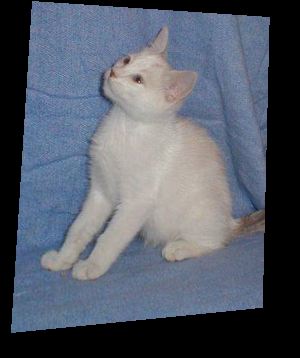

In [299]:
transform_obj = transforms.RandomPerspective(p=1,distortion_scale=0.3,fill=0)
transform_obj(pil_img)

## RandomInvert
- p 파라미터 확률로 색상반전

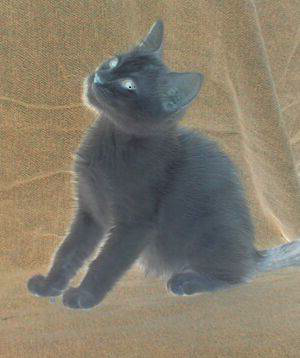

In [300]:
transform_obj = transforms.RandomInvert(p=1)
transform_obj(pil_img)

## RandomPosterize
- p 파라미터 확률로 포스터화
- bits : 0~8 범위 값을 전달하면 되는데 낮을 수록 포스터화가 심해진다.

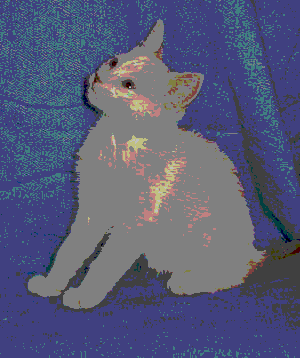

In [301]:
transform_obj = transforms.RandomPosterize(p=1, bits= 2)
transform_obj(pil_img)

## RandomEqualize
- p 파라미터 확률로 이미지 히스토그램 균등화

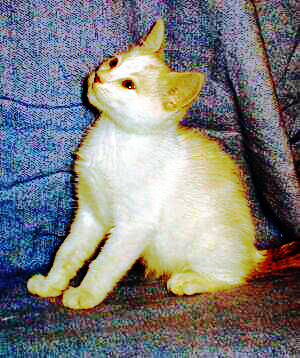

In [302]:
transform_obj = transforms.RandomEqualize(p=1)
transform_obj(pil_img)

## CenterCrop
- 지정한 사이즈로 center crop

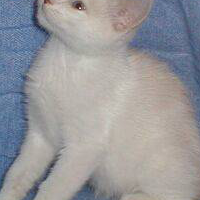

In [303]:
transform_obj = transforms.CenterCrop([200,200])
transform_obj(pil_img)

## RandomResizedCrop
- 랜덤으로 특정 부분을 crop후 지정된 사이즈로 리사이징
- size: 리사이즈 크기
- scale: crop 면적에 대한 하한과 상한값

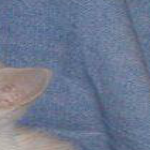

In [304]:
transform_obj = transforms.RandomResizedCrop(size=[150,150], scale=[0.1,  0.8])
transform_obj(pil_img)

## RandomAffine
- 아핀변환, 2차원 뒤틀기
- degrees: 각도 범위

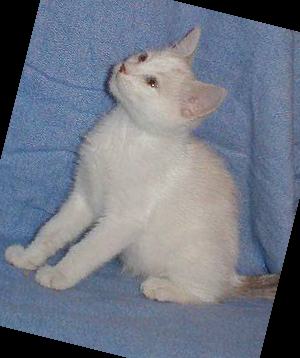

In [305]:
transform_obj = transforms.RandomAffine(degrees=50)
transform_obj(pil_img)

## RandomApply
- p 파라미터 확률로 첫번째 인수로 받은 Transfrom 객체들을 실행한다.

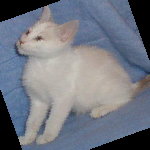

In [306]:
transfrom_list = [
    transforms.RandomResizedCrop([150,150]),
    transforms.RandomAffine(degrees=50)
]
transform_obj = transforms.RandomApply(transfrom_list, p=1)
transform_obj(pil_img)

In [307]:
final_transform(pil_img)

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

# Compose
- 여러 단계로 변환해야하는 경우 변환 객체들을 묶을 수 있다.

In [308]:
lst = [
    transforms.Resize([150,150]),
    transforms.RandomHorizontalFlip(p=0.6),
    transforms.ToTensor()
]
transform_obj = transforms.Compose(lst)
transform_obj(pil_img).shape

torch.Size([3, 150, 150])

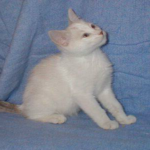

In [309]:
lst = [
    transforms.Resize([150,150]),
    transforms.RandomHorizontalFlip(p=0.6),
    #transforms.ToTensor()
]
transform_obj = transforms.Compose(lst)
transform_obj(pil_img)

In [310]:
from torchvision import transforms

# 첫 번째 변환 리스트
lst = [
    transforms.Resize([150, 150]),
    transforms.RandomHorizontalFlip(p=0.6),
    transforms.RandomVerticalFlip(p=1)
]

# 두 번째 변환 리스트
transfrom_list = [
    transforms.RandomResizedCrop([150, 150]),
    transforms.RandomAffine(degrees=50),
    transforms.ToTensor() 
]

# 첫 번째 변환을 Compose로 결합
combined_transform = transforms.Compose(lst + transfrom_list)

# 전체 변환을 RandomApply로 0.4 확률로 적용
final_transform = transforms.RandomApply([combined_transform], p=0.7)


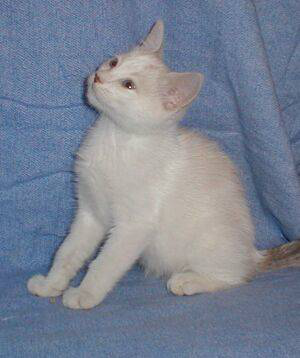

In [311]:
final_transform(pil_img)

In [312]:
target = target.reshape(-1,1) # 정답 데이터 2차원으로 변경

# 학습용 변환 객체와 예측용 변환 객체 만들기

In [313]:
train_list = [
    transforms.Resize([150,150]), # 리사이징
    transforms.RandomHorizontalFlip(p=0.5), # 증강을 위한 p 파라미터 확률로 좌우반전
    transforms.ToTensor() # 스케일링및 C, H, W 형태로 텐서 변환
]
train_transform = transforms.Compose(train_list)

test_list = [
    transforms.Resize([150,150]), # 리사이징
    transforms.ToTensor() # 스케일링및 C, H, W 형태로 텐서 변환
]
test_transform = transforms.Compose(test_list)

In [359]:
from torchvision import transforms

# 첫 번째 변환 리스트
lst = [
    transforms.Resize([150, 150]),
    transforms.RandomHorizontalFlip(p=0.6),
    transforms.RandomVerticalFlip(p=1)
]

# 두 번째 변환 리스트 (오타 수정)
transform_list = [
    transforms.RandomAffine(degrees=50),
    transforms.ToTensor()
]

# 테스트 변환 리스트
test_list = [
    transforms.Resize([150, 150]),  # 리사이징
    transforms.ToTensor()  # 스케일링 및 C, H, W 형태로 텐서 변환
]

# 첫 번째 변환을 Compose로 결합
combined_transform = transforms.Compose(lst + transform_list)

# 학습용 변환 (70% 확률로 combined_transform 적용)
train_transform = transforms.RandomApply([combined_transform], p=1) 

'''RandomApply([combined_transform], p=1)  p의 값이 1이 아닌 다른 확률이면 
Pil 객체를 반환해서 데이터 로더에서 오류가 나옴'''

# 테스트용 변환
test_transform = transforms.Compose(test_list)


# 데이터셋 클래스 만들기

In [371]:
from torchvision import transforms
from PIL import Image
import torch

class CatDogDataset(torch.utils.data.Dataset):
    def __init__(self, transform, x, y=None):
        self.transform = transform
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        item = {}
        x = Image.open(self.x[idx])

        # Apply the transformation
        item["new_x"] = self.transform(x)  # This should return a Tensor

        # Original transform (e.g., for comparison or baseline)
        original_transform = transforms.Compose([
            transforms.Resize([150, 150]),
            transforms.ToTensor()
        ])
        item["origin_x"] = original_transform(x)  # This should return a Tensor

        if self.y is not None:
            item["y"] = torch.Tensor(self.y[idx])  # Use torch.tensor instead of torch.Tensor for consistency

        #print(type(item["new_x"]))  # Should be <class 'torch.Tensor'>
        #print(type(item["origin_x"]))  # Should be <class 'torch.Tensor'>
        
        return item


In [372]:
# Example usage
dt = CatDogDataset(train_transform, train, target)
dl = torch.utils.data.DataLoader(dt, batch_size=2, shuffle=False)
batch = next(iter(dl))
batch

{'new_x': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],
 
          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],
 
          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [

In [373]:
dl.dataset[0]

{'new_x': tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 'origin_x': tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ...,

In [374]:
batch = next(iter(dl))
'''JpegImageFile 타입 없는지 확인'''
batch 

{'new_x': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],
 
          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],
 
          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [

In [375]:
batch["new_x"].shape,batch["origin_x"].shape # batch, channel, height, width

(torch.Size([2, 3, 150, 150]), torch.Size([2, 3, 150, 150]))

In [376]:
conv_net = torch.nn.Conv2d(3, 8, 3)
conv_net(batch["new_x"]).shape


torch.Size([2, 8, 148, 148])

# 모델 만들기

In [377]:
class Conv2Net(torch.nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size):
        super().__init__()
        self.seq = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels, out_channels, kernel_size), # 합성곱 신경망
            torch.nn.BatchNorm2d(out_channels), # 배치 정규화
            torch.nn.LeakyReLU(), # 비선형성을 주기 위한 활성화 함수
            torch.nn.MaxPool2d(2) # 절반으로 feature map의 높이와 넓이를 줄이기
            )
# 질문 이 객체 내에서
    def forward(self, x):
        return self.seq(x)

In [378]:
conv_net = Conv2Net(3, 8, 3)
conv_net(batch["new_x"]).shape

torch.Size([2, 8, 74, 74])

In [379]:
a=[1,2,3,4]
for i in a:
    for j in a[i:]:
        print(i*j)

2
3
4
6
8
12


In [380]:
import torch
import torch.nn as nn

class Net(nn.Module):
    def __init__(self, in_channel=3, out_channel=16, kernel_size=3):
        super().__init__()
        # Conv2Net을 nn.Conv2d로 변경
        self.conv1 = nn.Conv2d(in_channel, out_channel, kernel_size)
        self.conv2 = nn.Conv2d(out_channel, out_channel*2, kernel_size)
        self.conv3 = nn.Conv2d(out_channel*2, out_channel*4, kernel_size)
        self.conv4 = nn.Conv2d(out_channel*4, out_channel*8, kernel_size)

        self.maxpool = nn.AdaptiveMaxPool2d(1)
        self.avgpool = nn.AdaptiveAvgPool2d(1)

        self.flatten = nn.Flatten()
        self.dropout = nn.Dropout(0.2)

        self.fc = nn.Linear(out_channel*8, 1)
        self.hadamard = nn.Linear (out_channel*4, 1)

    
        self.h = self.w = None
        self.new_data_info = self.origin_data_info = None

    def forward(self, new_x, origin_x):
        # 새로운 데이터와 원본 데이터에 대해 Conv 레이어 통과
        n_x = self.conv4(self.conv3(self.conv2(self.conv1(new_x))))
        o_x = self.conv4(self.conv3(self.conv2(self.conv1(origin_x)))) 

        # 채널 수 불일치 여부 확인
        if n_x.shape[1] != o_x.shape[1]:
            print("두 개의 샘플 데이터의 채널 수가 불일치합니다.")
        else:
            pass

        # 가로, 세로 중간점 계산
        w = o_x.shape[2] // 2
        h = o_x.shape[3] // 2

        # n_x와 o_x를 네 부분으로 분할
        n_x1 = n_x[:, :o_x.shape[1]//2, :h, :w]  # 오른쪽 상단
        n_x2 = n_x[:, o_x.shape[1]//2:, :h, w:]  # 왼쪽 상단
        n_x3 = n_x[:, :o_x.shape[1]//2, h:, :w]  # 오른쪽 하단
        n_x4 = n_x[:, o_x.shape[1]//2:, h:, w:]  # 왼쪽 하단

        o_x1 = o_x[:, :o_x.shape[1]//2, :h, :w]  # 오른쪽 상단
        o_x2 = o_x[:, o_x.shape[1]//2:, :h, w:]  # 왼쪽 상단
        o_x3 = o_x[:, :o_x.shape[1]//2, h:, :w]  # 오른쪽 하단
        o_x4 = o_x[:, o_x.shape[1]//2:, h:, w:]  # 왼쪽 하단

        # 각 부분에 대해 Max Pooling 적용
        new_data_info = [self.maxpool(n_x1), self.maxpool(n_x2), self.maxpool(n_x3), self.maxpool(n_x4)]
        origin_data_info = [self.maxpool(o_x1), self.maxpool(o_x2), self.maxpool(o_x3), self.maxpool(o_x4)]

        # 리스트 컴프리헨션
        new_data_info = [i * j for idx, i in enumerate(new_data_info) for j in new_data_info[idx:]]
        origin_data_info = [i * j for idx, i in enumerate(origin_data_info) for j in origin_data_info[idx:]]

        # 텐서 합계 구하기 (torch.sum 사용)
        new_data_sum = torch.stack(new_data_info).sum(dim=0)
        origin_data_sum = torch.stack(origin_data_info).sum(dim=0)

        #print((new_data_sum*origin_data_sum).shape)  # 텐서 크기 출력

        '''정보량에서의 차이
        Concatenation:

        장점: 각 데이터의 원래 정보가 유지되며, 모델은 이 두 정보를 독립적으로 다룰 수 있습니다.
        단점: 두 데이터의 정보량이 단순히 더해지므로, 데이터의 상호작용을 모델이 학습하지 않습니다.
        Element-wise Multiplication:

        장점: 두 데이터 간의 상호작용을 모델이 학습할 수 있습니다. 이는 특정 패턴이 두 데이터 모두에 동시에 존재할 때 더욱 효과적일 수 있습니다.
        단점: 정보가 압축될 수 있으며, 두 데이터 중 하나라도 작은 값이 포함되면 결과 값이 0에 가까워질 수 있습니다.'''

        # new_data_sum origin_data_sum 결합
        x = torch.cat((new_data_sum, origin_data_sum), dim=1)
        
        #print((new_data_sum*origin_data_sum).shape)
        hadamard = self.flatten(new_data_sum*origin_data_sum)
        #print(hadamard.shape)
        

        x_ = self.hadamard(hadamard.squeeze(0))

        #print(x_.shape)

        x = self.flatten(x)  # b, c, hw
        x = self.dropout(x)

        return self.fc(x) + x_

In [381]:
model = Net()
model(batch["new_x"], batch["origin_x"])

tensor([[-0.1545],
        [-0.0748]], grad_fn=<AddBackward0>)

# 학습 loop 함수

In [382]:
def train_loop(dataloader, model, loss_fn, optimizer, device):
    epoch_loss = 0
    model.train() # 학습 모드

    for batch in dataloader:
        pred = model( batch["new_x"].to(device),batch["origin_x"].to(device) )
        loss = loss_fn( pred, batch["y"].to(device) )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
    epoch_loss /= len(dataloader)
    
    return epoch_loss

In [383]:
model = Net().to(device)
optimizer = torch.optim.Adam( model.parameters() )
loss_fn = torch.nn.BCEWithLogitsLoss()
train_loop(dl, model, loss_fn, optimizer, 'cuda')


0.9393620250917156

# 검증 및 테스트 loop 함수

In [394]:
@torch.no_grad()
def test_loop(dataloader, model, loss_fn, device):
    epoch_loss = 0
    pred_list = []
    act_func = torch.nn.Sigmoid()
    model.eval() # 평가 모드

    for batch in dataloader:
        pred = model( batch["new_x"].to(device),batch["origin_x"].to(device) )

        if batch.get("y") is not None:
            loss = loss_fn( pred, batch["y"].to(device) )
            epoch_loss += loss.item()

        pred = act_func(pred) # logit 값을 확률로 변환
        pred = pred.to("cpu").numpy() # cpu 이동후 ndarray 로변환
        pred_list.append(pred)
        
    epoch_loss /= len(dataloader)
    pred = np.concatenate(pred_list)
    return epoch_loss, pred

# 하이퍼 파라미터 정의

In [400]:
n_splits = 5
batch_size = 32
epochs = 100
loss_fn = torch.nn.BCEWithLogitsLoss()

In [401]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
cv = KFold(n_splits=n_splits, shuffle=True, random_state=SEED)

# 학습

In [402]:
DATA_PATH

'c:\\study\\03_Deep_Learning'

In [403]:
is_holdout = False
reset_seeds(SEED) # 재현을 위해 시드고정
best_score_list = []
for i, (tri, vai) in enumerate( cv.split(train) ):
    # 학습용 데이터
    x_train = train[tri]
    y_train = target[tri]

    # 검증용 데이터
    x_valid = train[vai]
    y_valid = target[vai]

    # 학습용 데이터로더 객체
    train_dt = CatDogDataset(train_transform, x_train, y_train)
    train_dl = torch.utils.data.DataLoader(train_dt, batch_size=batch_size, shuffle=True)

    # 검증용 데이터로더 객체
    valid_dt = CatDogDataset(test_transform, x_valid, y_valid)
    valid_dl = torch.utils.data.DataLoader(valid_dt, batch_size=batch_size, shuffle=False)

    # 모델 객체와 옵티마이저 객체 생성
    model = Net().to(device)
    optimizer = torch.optim.Adam( model.parameters() )
    best_score = 0 # 현재 최고 점수
    patience = 0 # 조기 종료 조건을 주기 위한 변수
    for epoch in tqdm( range(epochs) ):
        train_loss = train_loop(train_dl, model, loss_fn, optimizer, device)
        valid_loss, pred = test_loop(valid_dl, model, loss_fn, device)
        pred = (pred > 0.5).astype(int) # 확률 -> 클래스 값
        score = accuracy_score(y_valid, pred)
        
        #print(train_loss, valid_loss, score)
        
        if score > best_score:
            best_score = score # 최고 점수 업데이트
            patience = 0
            torch.save(model.state_dict(), f"{DATA_PATH}\\weight\\cats_dogs\\augment_model_{i}.pth") # 최고 점수 모델 가중치 저장

        patience += 1
        if patience == 5:
            break
    print(f"{i}번째 폴드 최고 정확도: {best_score}")
    best_score_list.append(best_score)
    if is_holdout:
        break



  0%|          | 0/100 [00:00<?, ?it/s]

0번째 폴드 최고 정확도: 0.6325


  0%|          | 0/100 [00:00<?, ?it/s]

1번째 폴드 최고 정확도: 0.65


  0%|          | 0/100 [00:00<?, ?it/s]

2번째 폴드 최고 정확도: 0.695


  0%|          | 0/100 [00:00<?, ?it/s]

3번째 폴드 최고 정확도: 0.6375


  0%|          | 0/100 [00:00<?, ?it/s]

4번째 폴드 최고 정확도: 0.705


In [ ]:
np.mean(best_score_list)

0.8035

# 테스트 데이터 평가해보기

In [406]:
cats_test_list = sorted(glob(f"{DATA_PATH}/data/cats_and_dogs/test/cats/*.jpg"), key=lambda x: x )
dogs_test_list = sorted(glob(f"{DATA_PATH}/data/cats_and_dogs/test/dogs/*.jpg"), key=lambda x: x )

len(cats_test_list), len(dogs_test_list)

(1000, 1000)

In [407]:
test_img_path = cats_test_list + dogs_test_list
test_labels = [0] * len(cats_test_list) + [1] * len(dogs_test_list)
len(test_img_path) , len(test_labels)

(2000, 2000)

In [408]:
test = np.array(test_img_path)
y_test = np.array(test_labels)

test_dt = CatDogDataset(test_transform,test)
test_dl = torch.utils.data.DataLoader(test_dt, batch_size=batch_size, shuffle=False)

In [416]:
import os

data_path = "C:\\study\\03_Deep_Learning\\weight\\cats_dogs"  # 올바른 경로로 수정
for i in range(n_splits):
    model = Net().to(device)
    model_path = os.path.join(data_path, f"augment_model_{i}.pth")
    state_dict = torch.load(model_path)
    model.load_state_dict(state_dict)

    _, pred = test_loop(test_dl, model, loss_fn, device)

    pred_list.append(pred)


In [417]:
pred = (pred > 0.5).astype(int)

In [418]:
accuracy_score(y_test, pred)
# 0.82
# 0.6795

0.6795